In [1]:
import numpy as np
#import nltk
import unicodedata
from collections import Counter
import matplotlib.pylab as plt
import pandas as pd
#import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from IPython.display import display, HTML

In [2]:
init_notebook_mode(connected=True)

In [4]:
#Abrir y cargar archivos
#Criticos
file1 = open('./Textos/España/2000/2000.txt', 'r')
texto_2000 = file1.read()
#file2 = open('./Textos/España/1975/critico/1975.txt', 'r')
#texto_1975 = file2.read()
#file3 = open('./Textos/España/1950/critico/1950.txt', 'r')
#texto_1950 = file3.read()
file4 = open('./Textos/España/1925/1925.txt', 'r')
texto_1925 = file4.read()
file5 = open('./Textos/España/1900/1900.txt', 'r')
texto_1900 = file5.read()
file6 = open('./Textos/España/1875/1875.txt', 'r')
texto_1875 = file6.read()
file7 = open('./Textos/España/1850/1850.txt', 'r')
texto_1850 = file7.read()
file8 = open('./Textos/España/1825/1825.txt', 'r')
texto_1825 = file8.read()
file9 = open('./Textos/España/1800/1800.txt', 'r')
texto_1800 = file9.read()
file10 = open('./Textos/España/1775/critico/1775.txt', 'r')
texto_1775 = file10.read()
file11 = open('./Textos/España/1750/critico/1750.txt', 'r')
texto_1750 = file11.read()
file12 = open('./Textos/España/1725/critico/1725.txt', 'r')
texto_1725 = file12.read()
file13 = open('./Textos/España/1700/critico/1700.txt', 'r')
texto_1700 = file13.read()

In [5]:
#Diccionario fonemización simple sin tilde
ori1 = ['qu','v','x','ch','h','ce','ci','c','j','ge','gi','gue','gui','y ','y,','y.','ll',' r','rr','sr','nr','lr']
new1 = ['k','b','ks','v','','ze','zi','k','x','xe','xi','ge','gi','i ','i,','i.','h',' q','q','sq','nq','lq']

In [6]:
#Diccionario fonemización simple con tilde
ori2 = ['qu','v','x','ch','h','ce','ci','cí','c','j','ge','gi','gí','gue','gui','guí','y ','y,','y.','ll',' r','rr','sr','nr','lr']
new2 = ['k','b','ks','v','','ze','zi','zí','k','x','xe','xi','xí','ge','gi','gí','i ','i,','i.','h',' q','q','sq','nq','lq']

In [7]:
#Puntuación a quitar
import string
punctuation = string.punctuation+'¡'+'"'+'¿'+'—'+'“'+'-'+'”'+'º'+'¿'+'—'+'“'+'-'+'”'+'¡'+'1'+'2'+'5'+'6'+'7'+'8'+'0'+'º'+'9'+'4'+'3'+'«'+'»'+'.'+'–'+'’'+'...'+'\n'+'ô'+'è'+'…'+''+'ü'+'ñ'+'ï'+'ç'+'ä'+'ê'+'ö'+'°'+'â'+'æ'+'\t'+'´'+'ª'

In [8]:
#Defino diacriticas y otras letras especiales ü->% y ñ->#
diacriticas = ['í','ú','á','é','ó']
normal = ['i','u','a','e','o','%']

In [9]:
#Funcion para año
def procesar(texto):
    #Cambio a minúscula
    texto = texto.lower()
    #Reemplazo fonemización simple
    texto_ps = texto
    texto_ps2 = texto
    for i in range(0,len(ori1)):
        texto_ps = texto_ps.replace(ori1[i],new1[i])
    for j in range(0,len(ori2)):
        texto_ps2 = texto_ps2.replace(ori2[j],new2[j])
        #Quito puntuación
    for p in punctuation:
        texto = texto.replace(p,'')
        texto_ps = texto_ps.replace(p,'')
        texto_ps2 = texto_ps.replace(p,'')
        #"Quito espacios en blancos"
    texto = texto.replace(' ','')
    texto_ps = texto_ps.replace(' ','')
    texto_ps2 = texto_ps.replace(' ','')
    #Quito todas las diacriticas para fig 1 a 4
    texto_i = texto_ps
    texto_i2 = texto_ps2
    for diac in range(0,len(diacriticas)):
        texto = texto.replace(diacriticas[diac],normal[diac])
        texto_ps = texto_ps.replace(diacriticas[diac],normal[diac])
        texto_ps2 = texto_ps2.replace(diacriticas[diac],normal[diac])
        
        #Texto para figura 3
    phone_w1 = {'ua':'wa','au':'aw','eu':'ew','ue':'we','iu':'iw','ui':'wi','uo':'wo','ou':'ow'}
    texto_w = texto_ps
    texto_w2 = texto_ps2
    for key in phone_w1.keys():
        texto_w = texto_w.replace(key,phone_w1[key])
    for key in phone_w1.keys():
        texto_w2 = texto_w2.replace(key,phone_w1[key])
        #Texto para figura 4
    phone_j = {'ia':'ja','ai':'aj','ei':'ej','ie':'je','io':'jo','oi':'oj','iu':'ju','ui':'uj'}
    phone_w2 = {'ua':'wa','au':'aw','eu':'ew','ue':'we','uo':'wo','ou':'ow','ju':'jw','uj':'wj'}
    texto_i1 = texto_ps
    texto_i1_2 = texto_ps2
    for key in phone_j.keys():
        texto_i1 = texto_i1.replace(key,phone_j[key])
    for key in phone_w2.keys():
        texto_i1 = texto_i1.replace(key,phone_w2[key])
    for key in phone_j.keys():
        texto_i1_2 = texto_i1_2.replace(key,phone_j[key])
    for key in phone_w2.keys():
        texto_i1_2 = texto_i1_2.replace(key,phone_w2[key])
        #Texto para figura 5
    phone_w3 = {'ua':'wa','au':'aw','eu':'ew','ue':'we','uo':'wo','ou':'ow','ju':'jw','uj':'wj','ui':'wi','iu':'iw'}
    for key in phone_j.keys():
        texto_i = texto_i.replace(key,phone_j[key])
    for diac in range(0,len(diacriticas)):
        texto_i = texto_i.replace(diacriticas[diac],normal[diac])
    for key in phone_w3.keys():
        texto_i = texto_i.replace(key,phone_w3[key])
    for key in phone_j.keys():
        texto_i2 = texto_i2.replace(key,phone_j[key])
    for diac in range(0,len(diacriticas)):
        texto_i2 = texto_i2.replace(diacriticas[diac],normal[diac])
    for key in phone_w3.keys():
        texto_i2 = texto_i2.replace(key,phone_w3[key])
    return texto_i2, texto_i, texto_i1_2, texto_i1, texto_w,texto_w2, texto, texto_ps, texto_ps2

In [10]:
#indicadores 
def indicadores(data1):
    D = []
    N = len(data1)
    for number in range(0,len(data1)):
        if number < len(data1)-1:
            d = data1['Fraccional'].iloc[number+1] - data1['Fraccional'].iloc[number]
            D.append(d)
        else: 
            d = data1['Fraccional'].iloc[number]
            D.append(d)
    desviacion = np.std(D)
    prom = np.mean(D)
    smoothness = np.absolute(prom)/desviacion
    shanon = -np.sum(data1['Fraccional']*np.log2(data1['Fraccional']))
    redundancy = 1-(shanon/np.log2(N))
    return N, D, smoothness, shanon, redundancy

In [11]:
texto_i2, texto_i, texto_i1_2, texto_i1, texto_w,texto_w2, texto, texto_ps, texto_ps2 = procesar(texto_1700)

In [12]:
#Función para Gráfica y Datos fig.1  Letras como fonemas
def Grafica_Datos_1(text):
    Contador = Counter(text)
    Data = pd.DataFrame.from_dict(Contador, orient='index', columns = ['Frecuencia'])
    Data['Fraccional'] = Data['Frecuencia']/sum(Data['Frecuencia'])
    Data = Data.sort_values(by = 'Fraccional', ascending = False)
    N, D, smoo, H, R = indicadores(Data)
    fig = plt.figure(figsize = (10,8))
    plt.plot(Data['Fraccional'],marker = 'o')
    indi = 'Smoothness ='+str(np.round(smoo,3))+'\n'+'Redundancy ='+str(np.round(R,3))+'\n'+'Shannon info ='+str(np.round(H,3))
    plt.figtext(0.65, .7,indi)
    plt.title('LETRAS COMO FONEMAS')
    plt.ylabel('Frecuecia Fraccional')
    plt.xlabel('Fonemas')
    plt.show()
    return fig, Data, N, D, smoo, H, R 

In [13]:
def Grafica_Datos_2(text_ps):
    Contador = Counter(text_ps)
    Data = pd.DataFrame.from_dict(Contador, orient='index', columns = ['Frecuencia'])
    Data['Fraccional'] = Data['Frecuencia']/sum(Data['Frecuencia'])
    Data = Data.sort_values(by = 'Fraccional', ascending = False)
    N, D, smoo, H, R = indicadores(Data)
    fig = plt.figure(figsize = (10,8))
    plt.plot(Data['Fraccional'], marker = 'o')
    indi = 'Smoothness ='+str(np.round(smoo,3))+'\n'+'Redundancy ='+str(np.round(R,3))+'\n'+'Shannon info ='+str(np.round(H,3))
    plt.figtext(.65, .7,indi)
    plt.title('FONEMIZACIÓN SIMPLE')
    plt.ylabel('Frecuecia Fraccional')
    plt.xlabel('Fonemas')
    plt.show()
    return fig, Data, N, D, smoo, H, R

In [14]:
#Función para Gráfica y Datos fig.3 Fonemas /w/ y /u/
def Grafica_Datos_3(text_w):
    Contador = Counter(text_w)
    Data = pd.DataFrame.from_dict(Contador, orient='index', columns = ['Frecuencia'])
    Data['Fraccional'] = Data['Frecuencia']/sum(Data['Frecuencia'])
    Data = Data.sort_values(by = 'Fraccional', ascending = False)
    N, D, smoo, H, R = indicadores(Data)
    fig = plt.figure(figsize = (10,8))
    plt.plot(Data['Fraccional'], marker ='o')
    indi = 'Smoothness ='+str(np.round(smoo,3))+'\n'+'Redundancy ='+str(np.round(R,3))+'\n'+'Shannon info ='+str(np.round(H,3))
    plt.figtext(.65, .7,indi)
    plt.title('SEMICONSONANTE /w/ COMO FONEMA SEPARADO DE VOCAL /u/')
    plt.ylabel('Frecuecia Fraccional')
    plt.xlabel('Fonemas')
    plt.show()
    return fig, Data, N, D, smoo, H, R 

In [15]:
#Función para Gráfica y Datos fig.4 Fonemas /w/ y /u/ & /i/ y /j/
def Grafica_Datos_4(text_i1):
    Contador = Counter(text_i1)
    Data = pd.DataFrame.from_dict(Contador, orient='index', columns = ['Frecuencia'])
    Data['Fraccional'] = Data['Frecuencia']/sum(Data['Frecuencia'])
    Data = Data.sort_values(by = 'Fraccional', ascending = False)
    N, D, smoo, H, R = indicadores(Data)
    fig = plt.figure(figsize = (10,8))
    plt.plot(Data['Fraccional'], marker ='o')
    indi = 'Smoothness ='+str(np.round(smoo,3))+'\n'+'Redundancy ='+str(np.round(R,3))+'\n'+'Shannon info ='+str(np.round(H,3))
    plt.figtext(.65, .7,indi)
    plt.title('SEMICONSONANTES /w/, /j/ COMO FONEMAS SEPARADOS DE VOCALES /u/, /i/')
    plt.ylabel('Frecuecia Fraccional')
    plt.xlabel('Fonemas')
    plt.show()
    return fig, Data, N, D, smoo, H, R 

In [16]:
#Función para Gráfica y Datos fig.5 Fonemas /w/ y /u/ & /i/ y /j/ tomando encuenta diacríticas
def Grafica_Datos_5(text_i):
    Contador = Counter(text_i)
    Data = pd.DataFrame.from_dict(Contador, orient='index', columns = ['Frecuencia'])
    Data['Fraccional'] = Data['Frecuencia']/sum(Data['Frecuencia'])
    Data = Data.sort_values(by = 'Fraccional', ascending = False)
    N, D, smoo, H, R = indicadores(Data)
    fig = plt.figure(figsize = (10,8))
    plt.plot(Data['Fraccional'], marker ='o')
    indi = 'Smoothness ='+str(np.round(smoo,3))+'\n'+'Redundancy ='+str(np.round(R,3))+'\n'+'Shannon info ='+str(np.round(H,3))
    plt.figtext(.65, .7,indi)
    plt.title('SEMICONSONANTES /w/, /j/ COMO FONEMAS SEPARADOS DE VOCALES /u/, /i/'+'\n'+
             'DIACRÍTICAS PARA DISTINGUIR /i/ y /j/')
    plt.ylabel('Frecuecia Fraccional')
    plt.xlabel('Fonemas')
    plt.show()
    return fig, Data, N, D, smoo, H, R 

In [17]:
def productos(texto_año):
    texto_i2, texto_i, texto_i1_2, texto_i1, texto_w,texto_w2, texto, texto_ps, texto_ps2 = procesar(texto_año)
    f1, data1, N1, D1, smoo1, H1, R1 = Grafica_Datos_1(texto)
    f2, data2, N2, D2, smoo2, H2, R2 = Grafica_Datos_2(texto_ps)
    f3, data3, N3, D3, smoo3, H3, R3 = Grafica_Datos_3(texto_w)
    f4, data4, N4, D4, smoo4, H4, R4 = Grafica_Datos_4(texto_i1)
    f5, data5, N5, D5, smoo5, H5, R5 = Grafica_Datos_5(texto_i)
    return data2

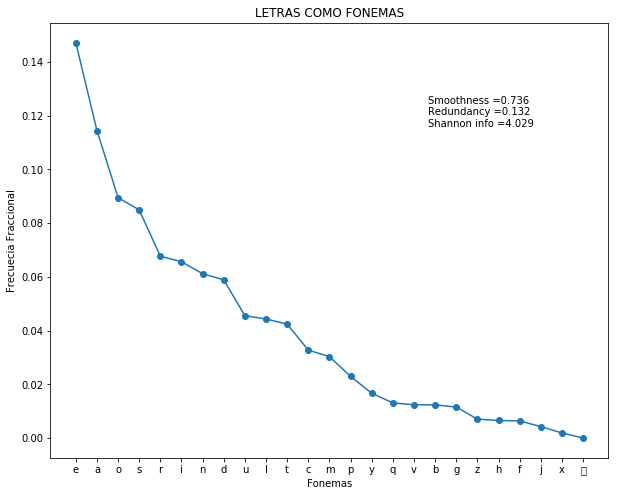

In [18]:
f1, data1, N1, D1, smoo1, H1, R1 = Grafica_Datos_1(texto)

In [19]:
trace = go.Scatter(x = list(range(0,len(data1.index))), y = data1['Fraccional'], mode = 'lines+markers')

In [20]:
data = [trace]
iplot(data)

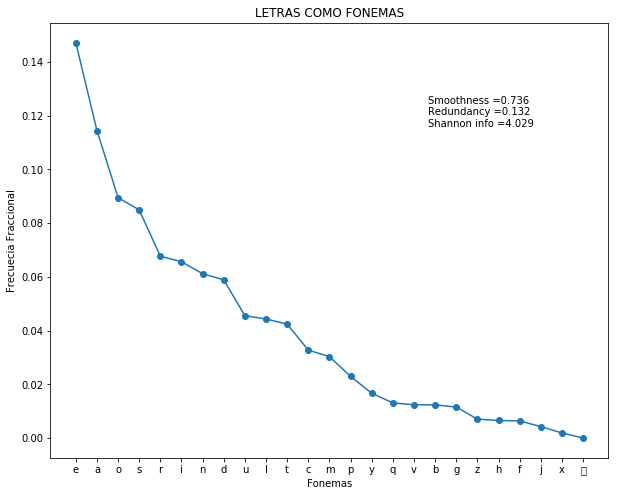

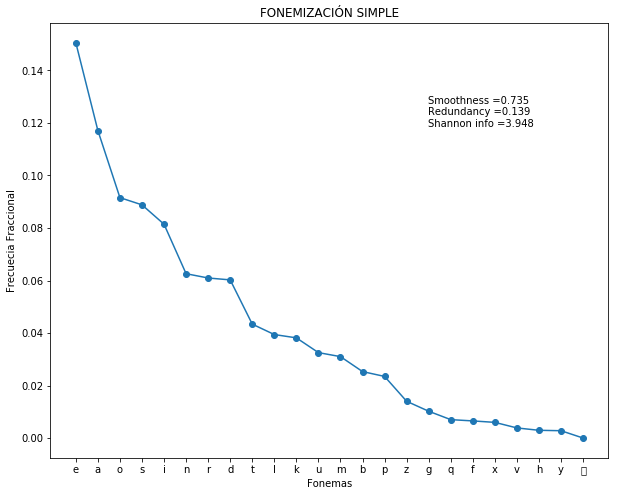

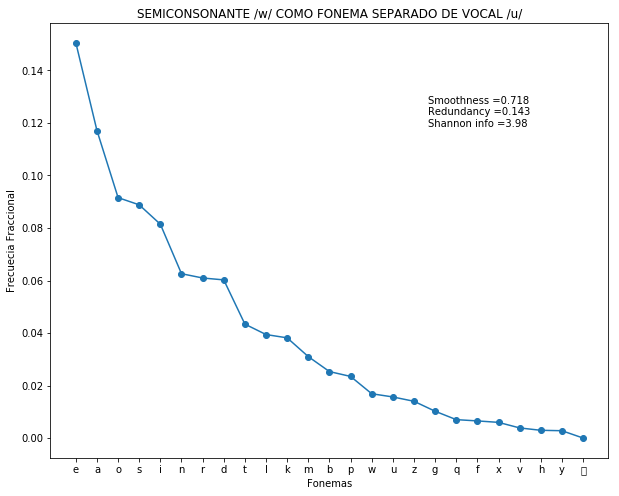

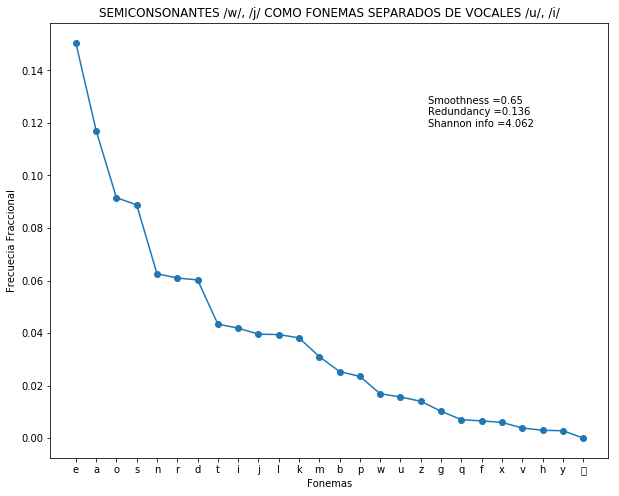

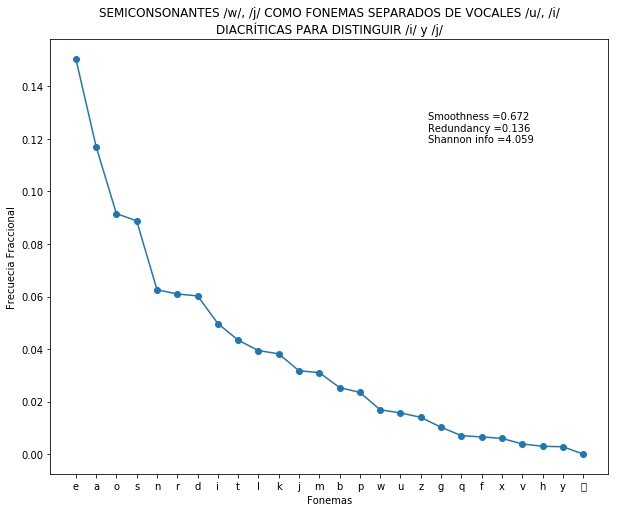

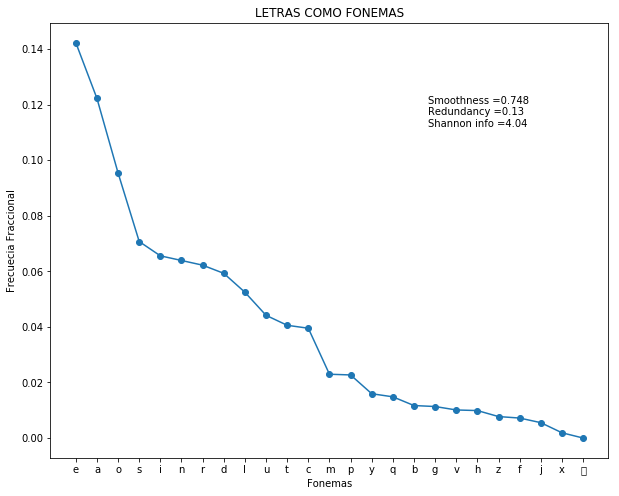

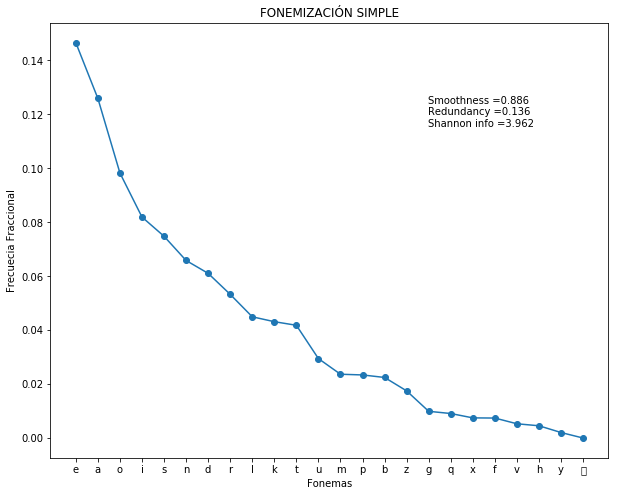

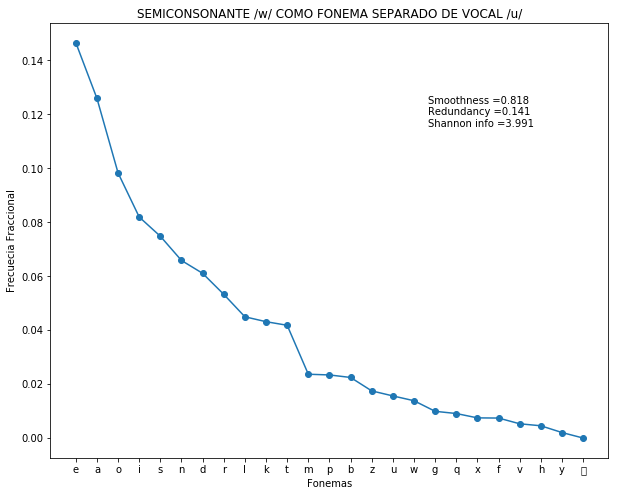

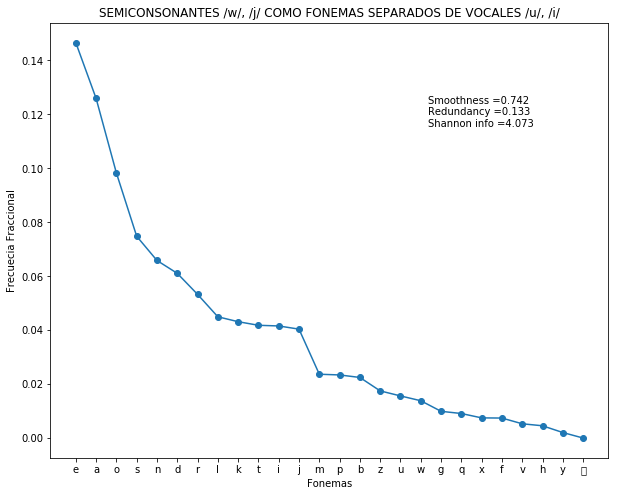

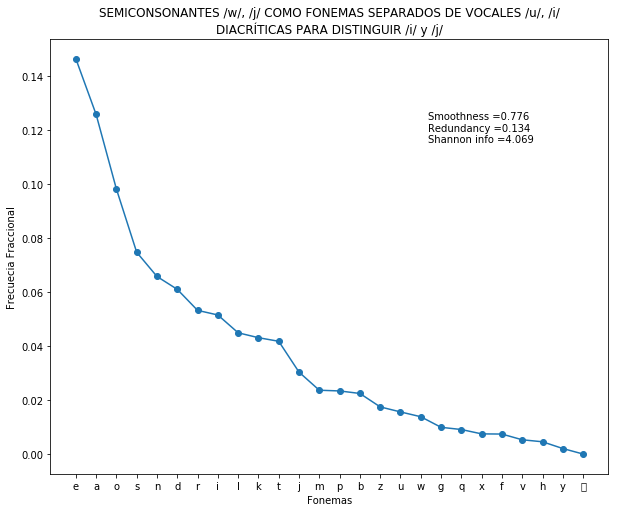

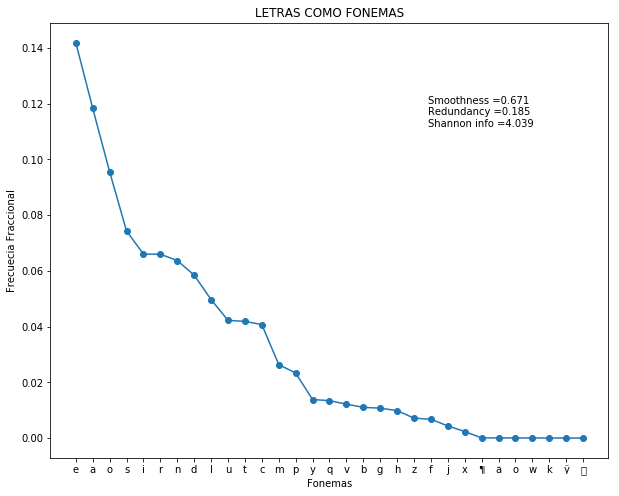

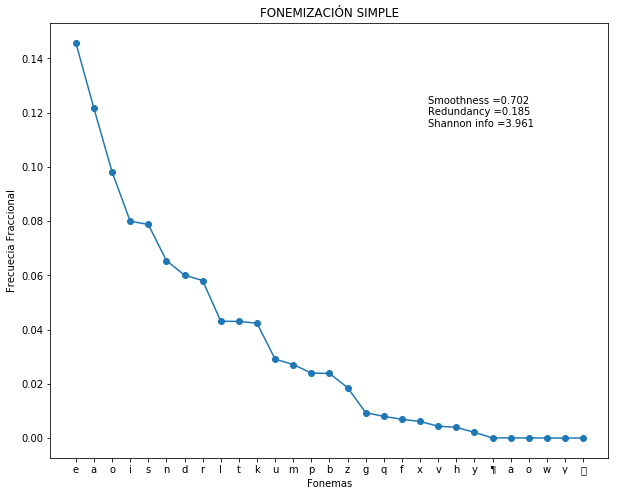

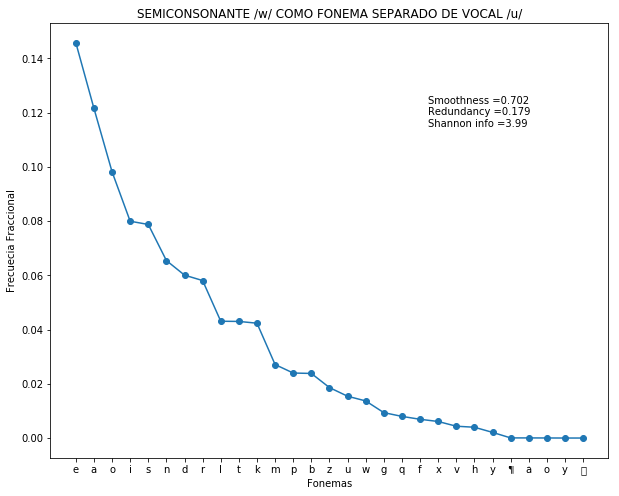

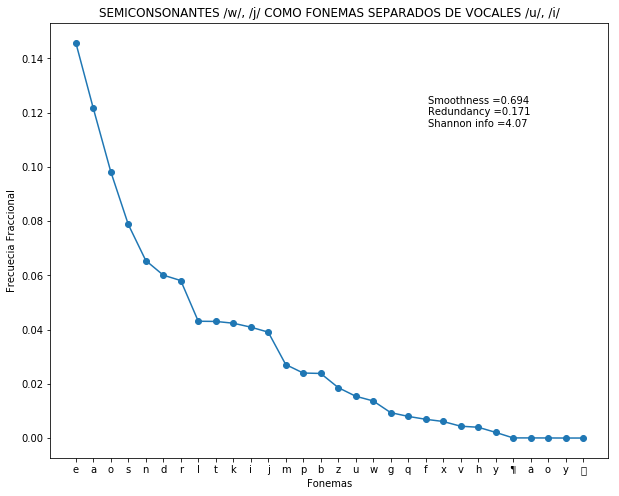

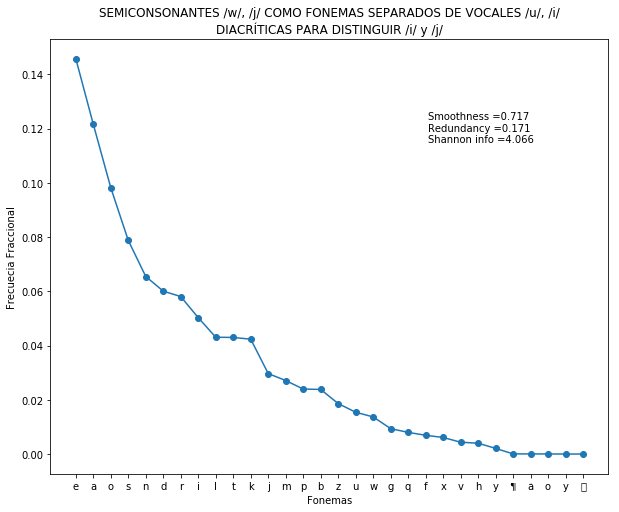

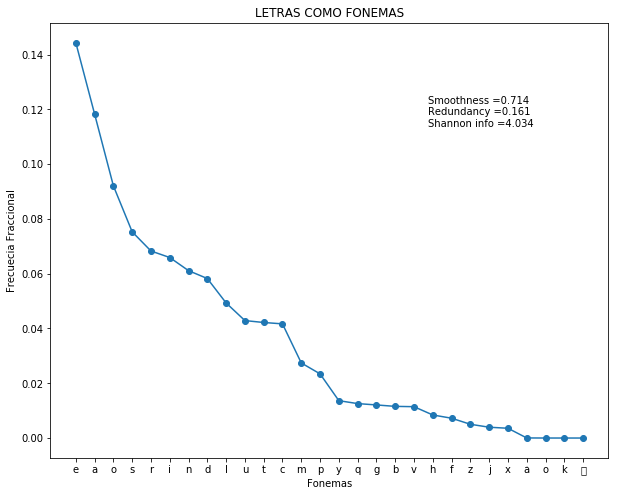

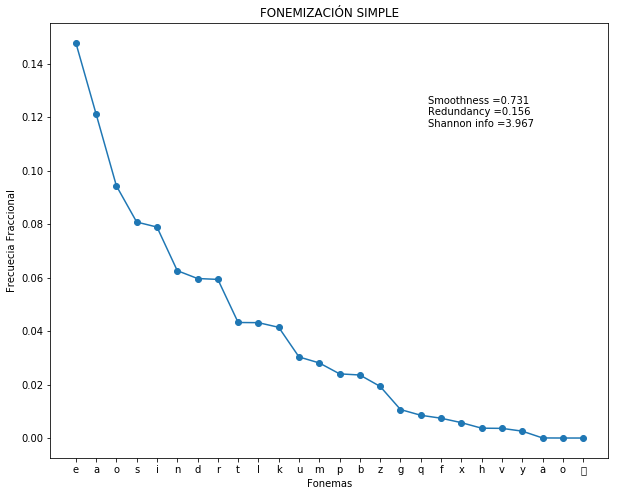

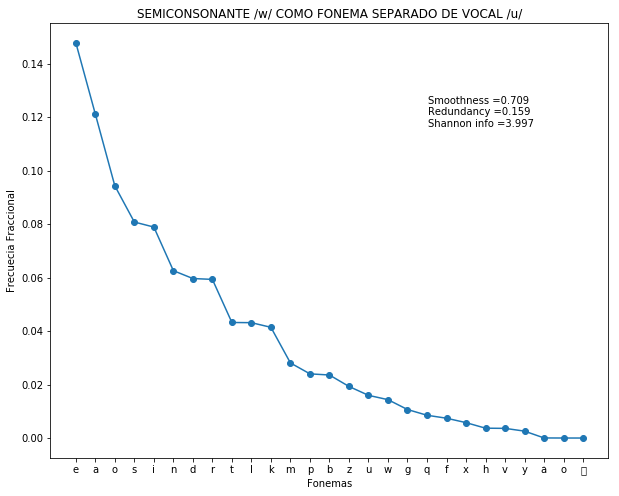

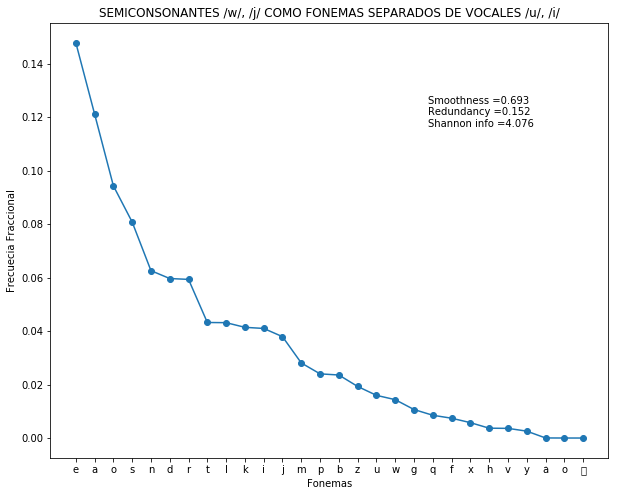

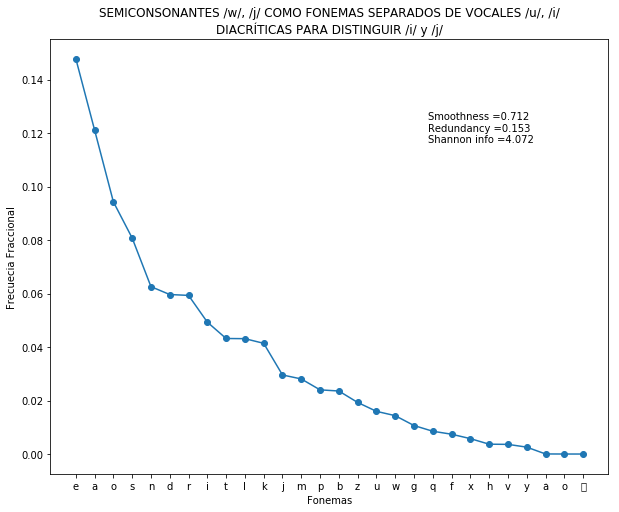

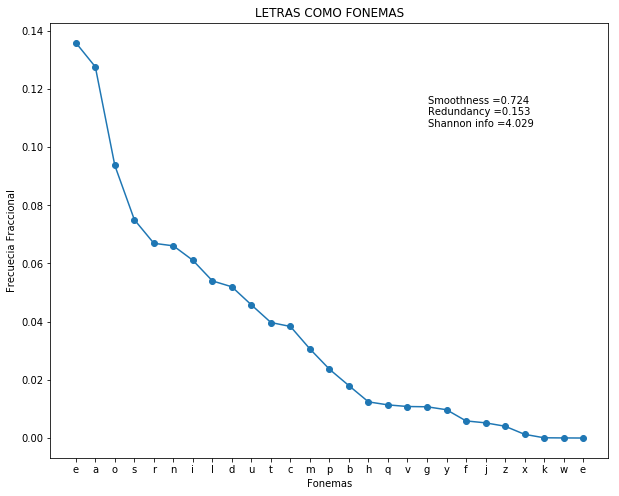

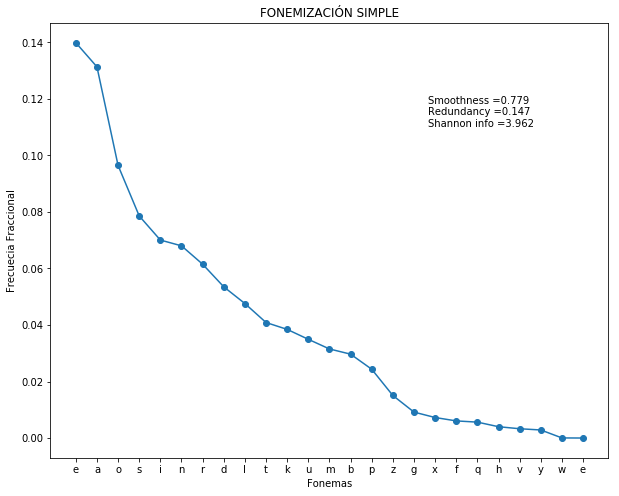

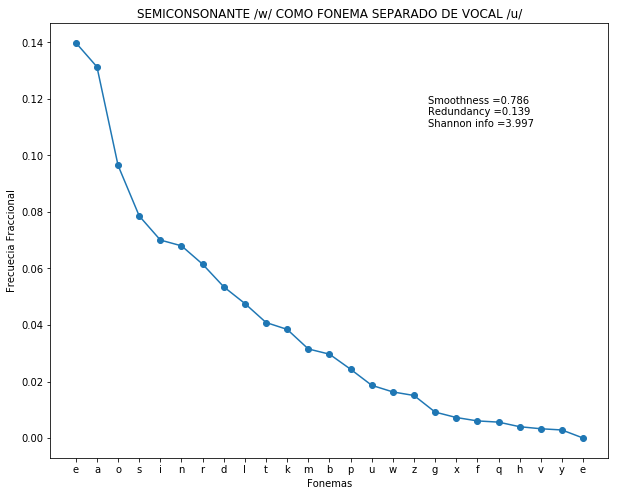

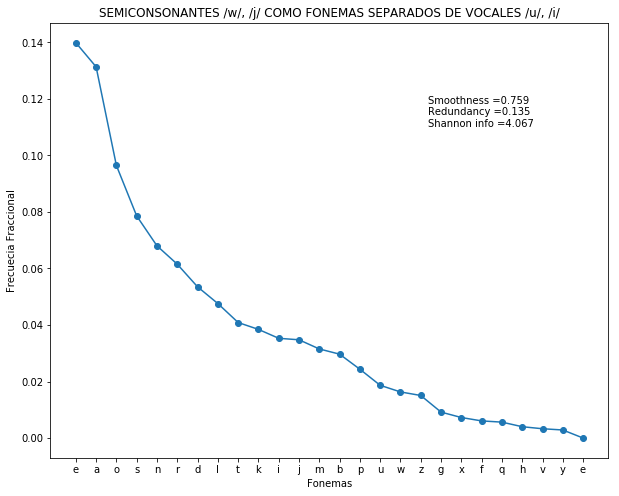

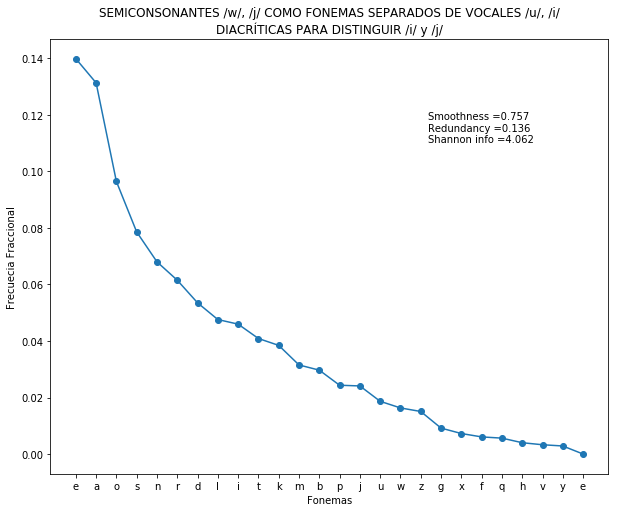

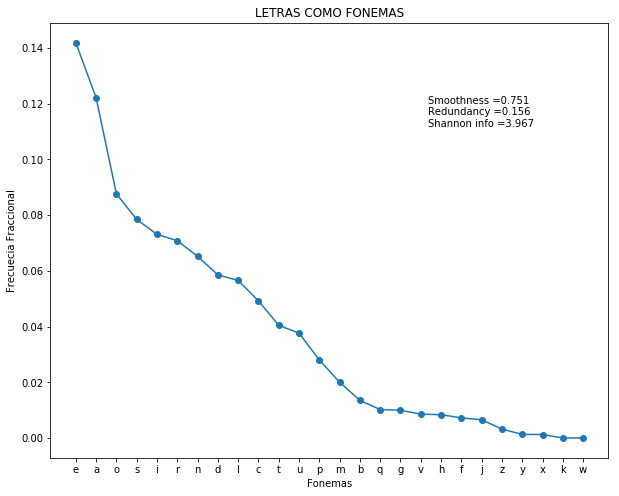

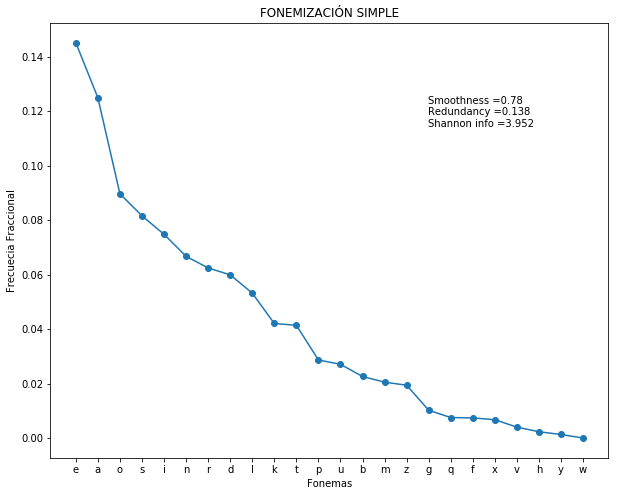

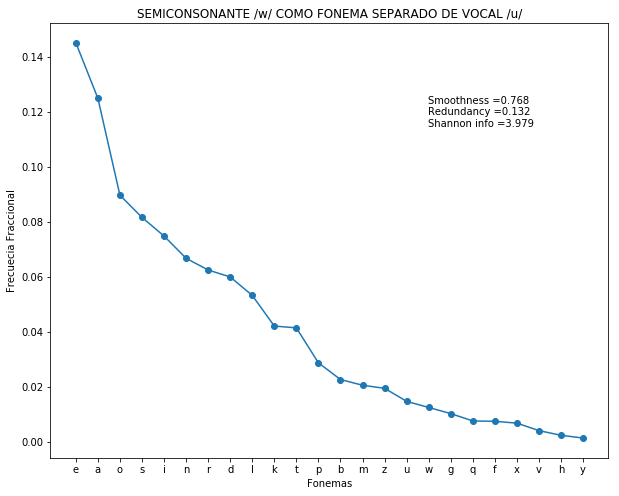

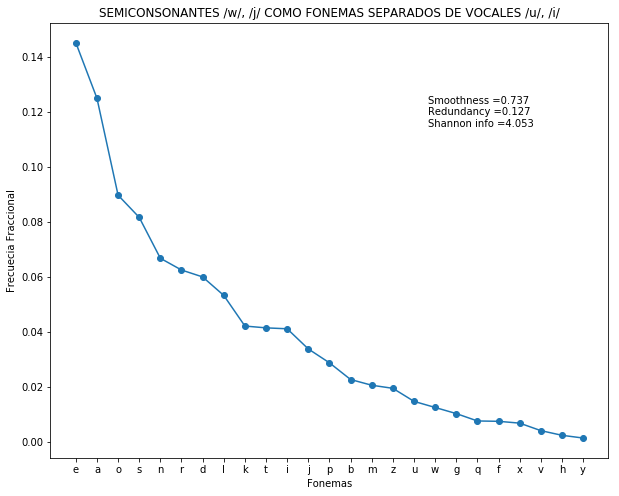

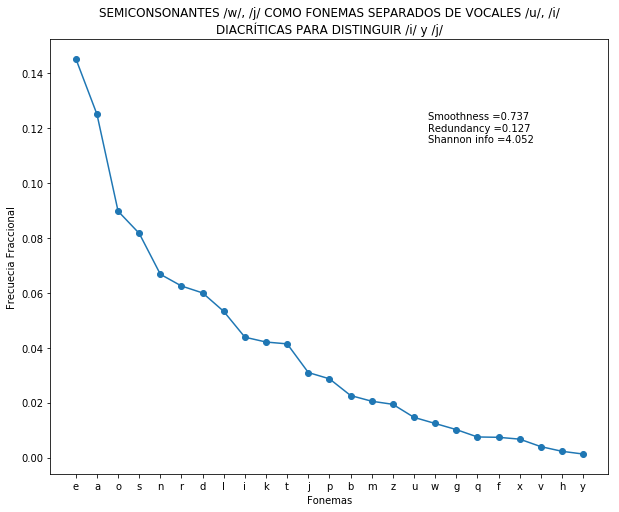

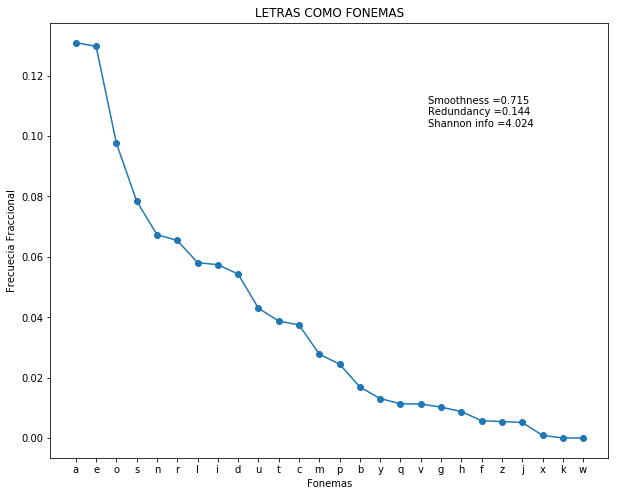

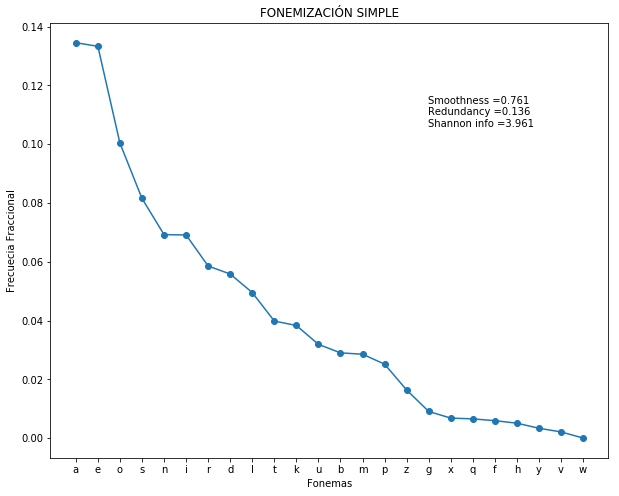

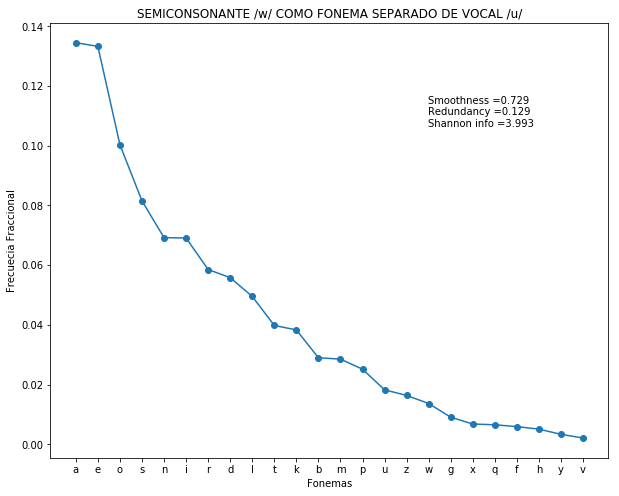

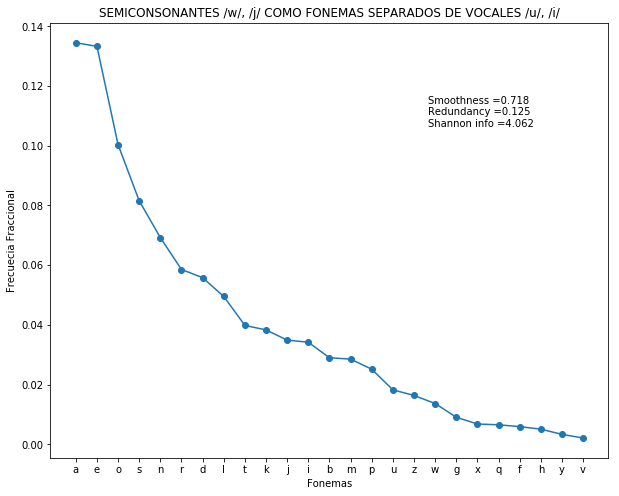

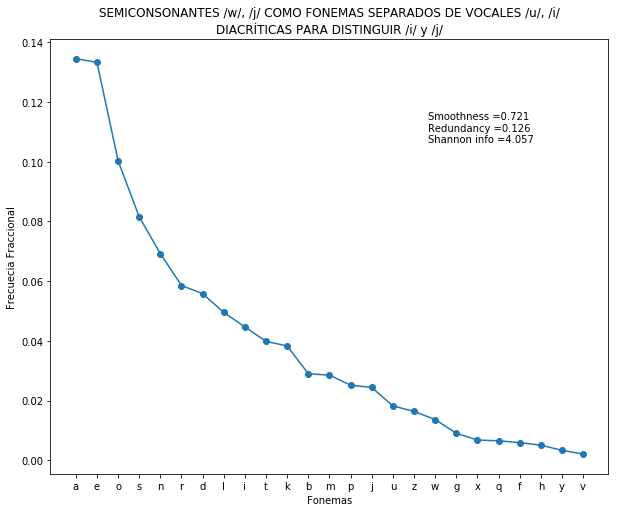

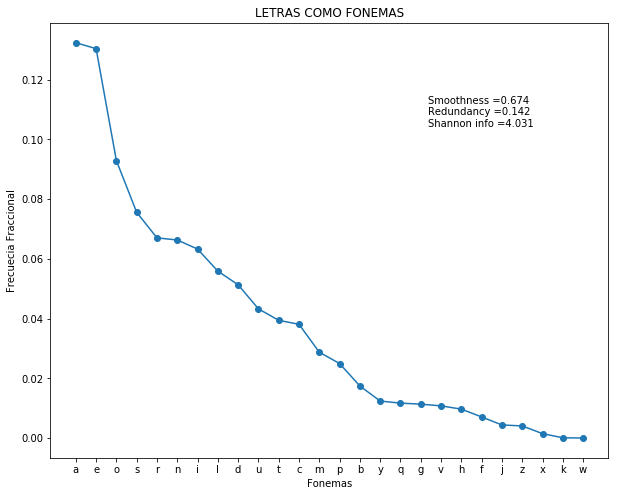

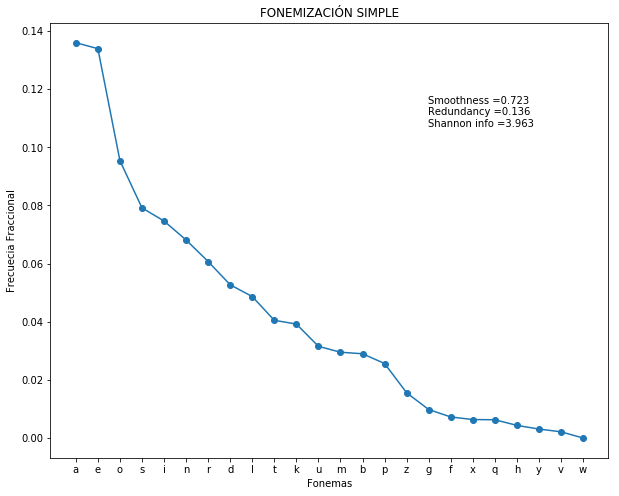

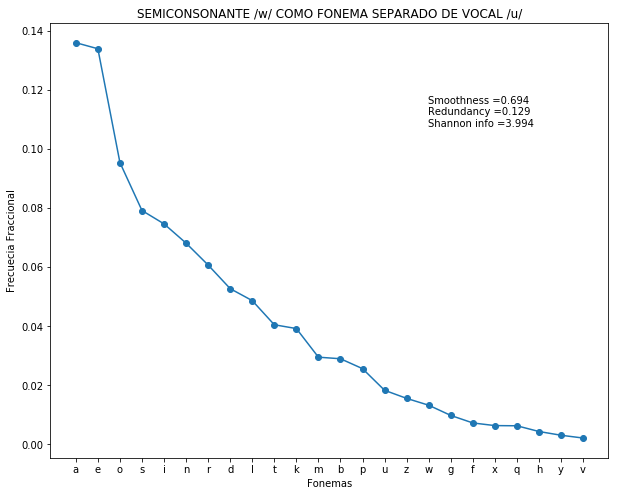

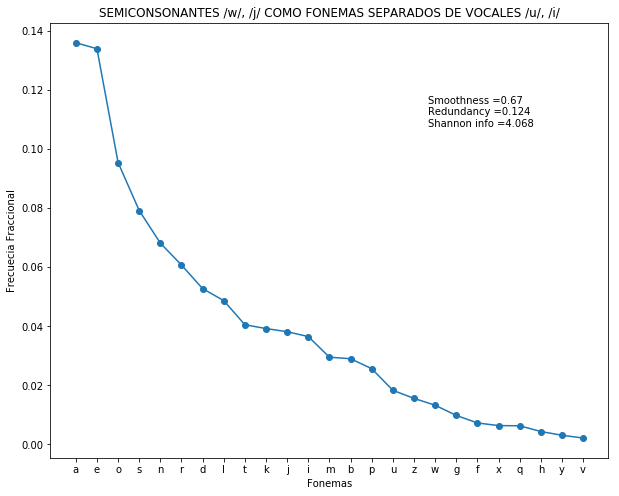

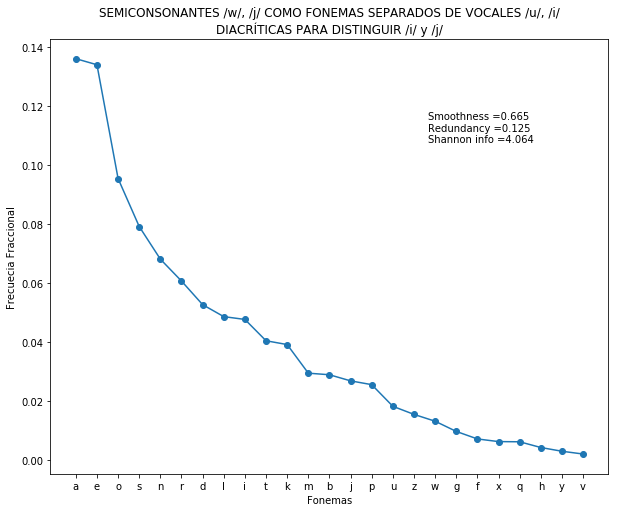

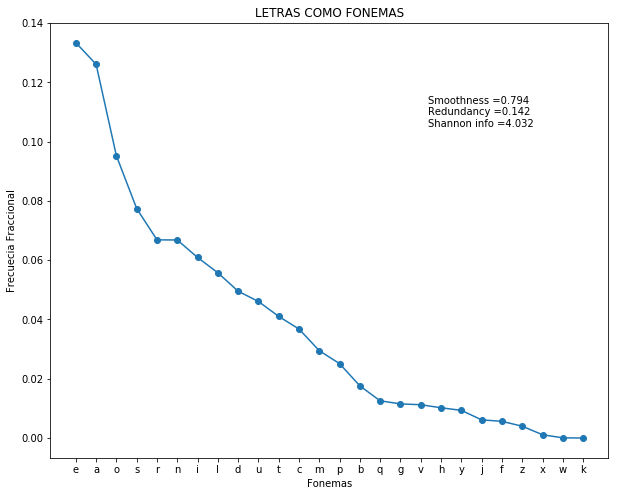

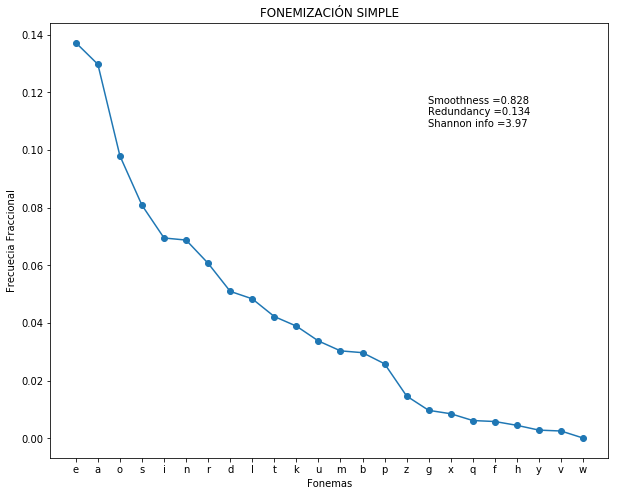

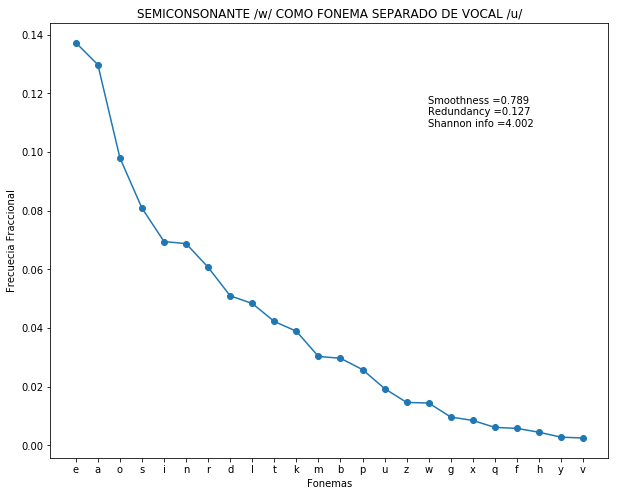

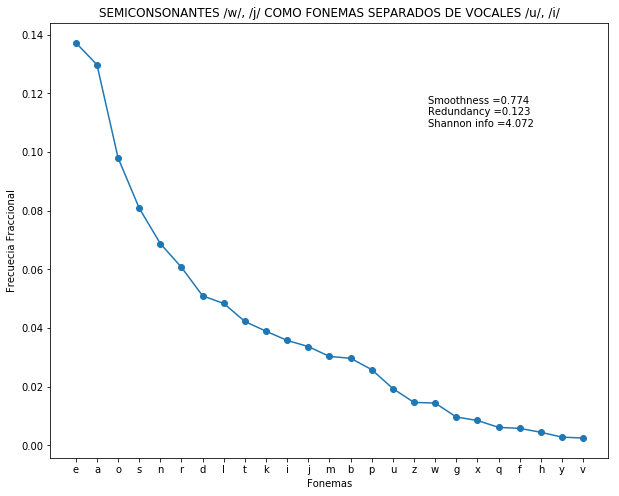

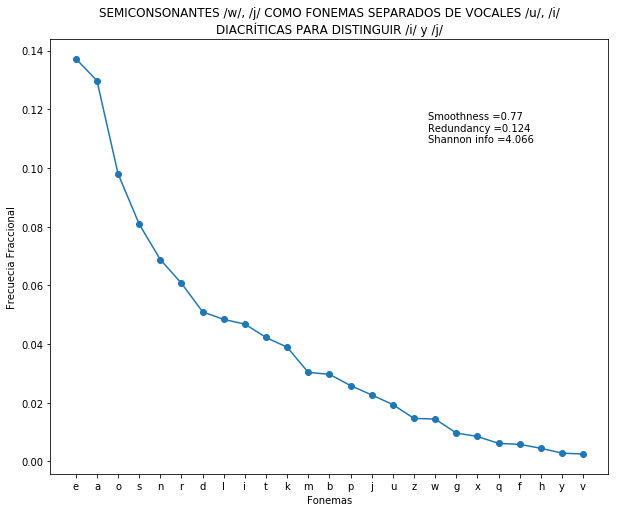

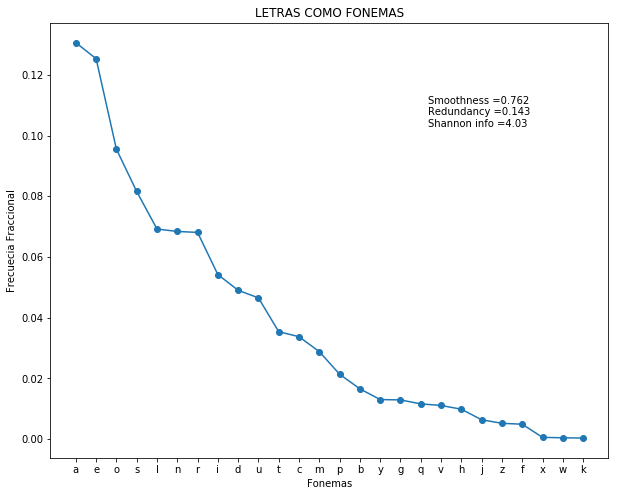

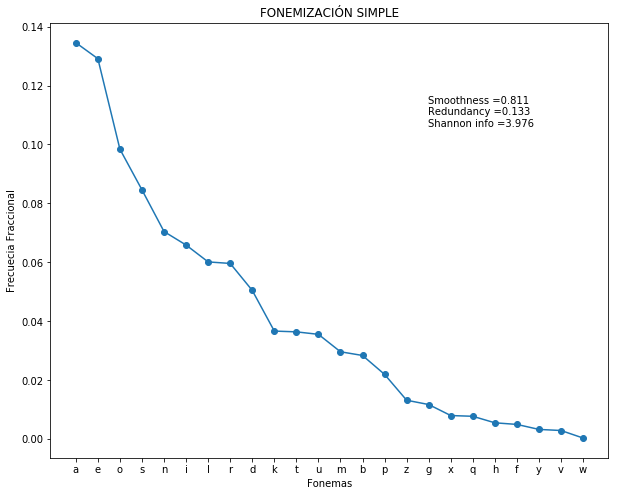

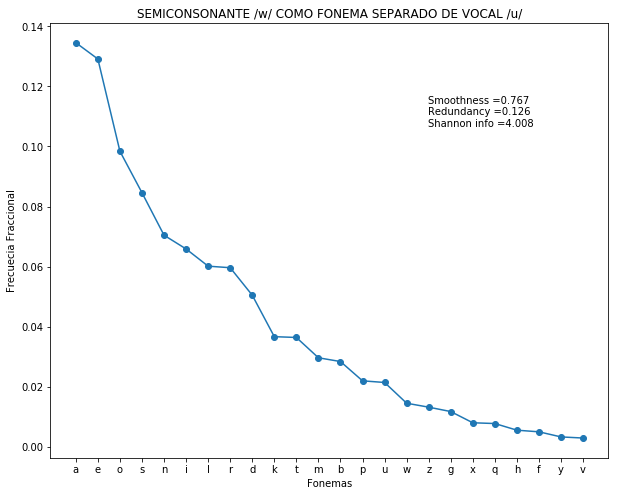

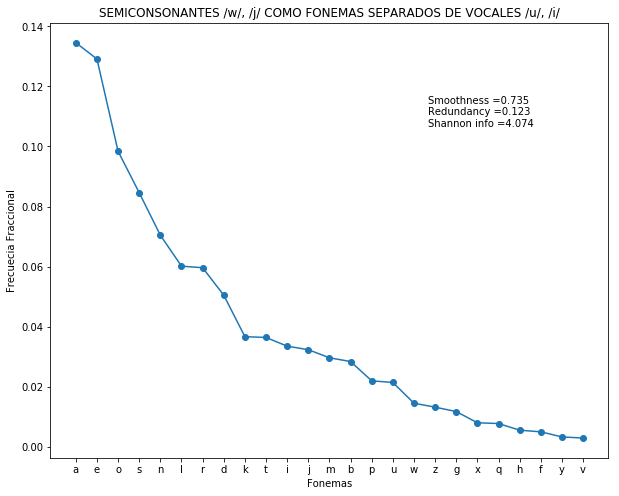

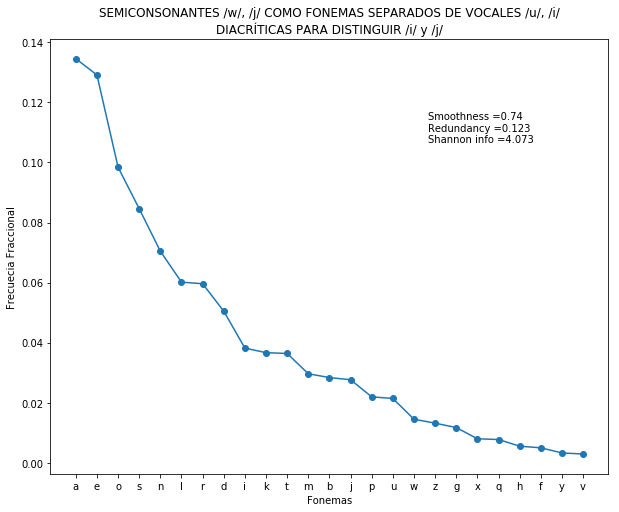

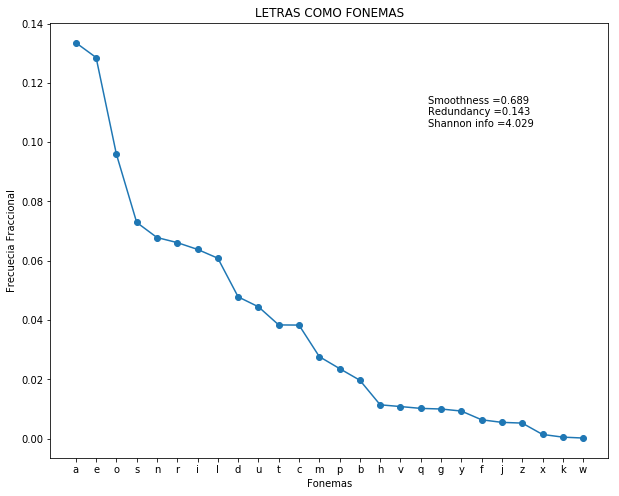

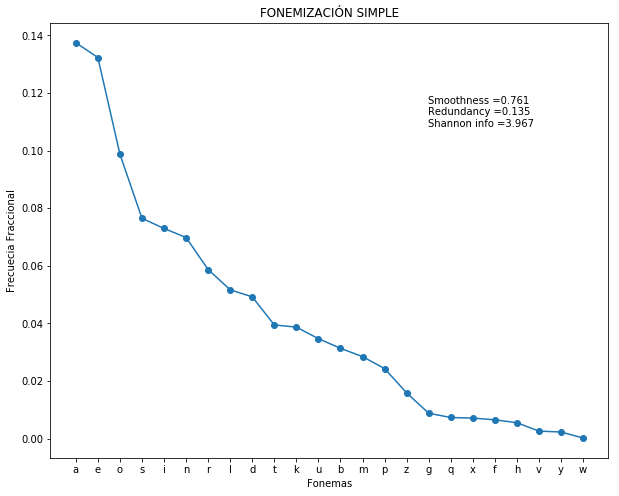

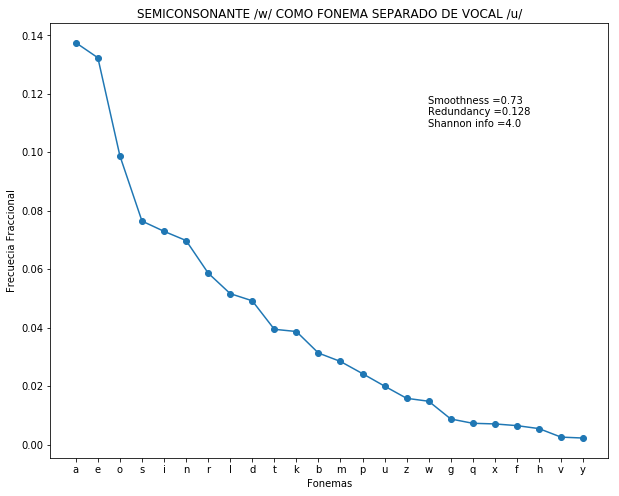

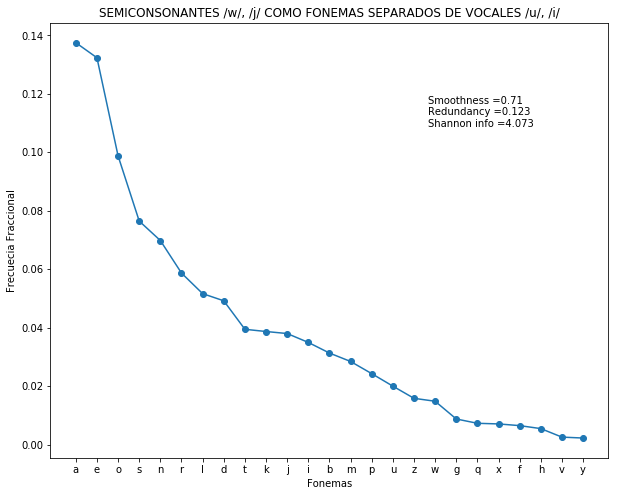

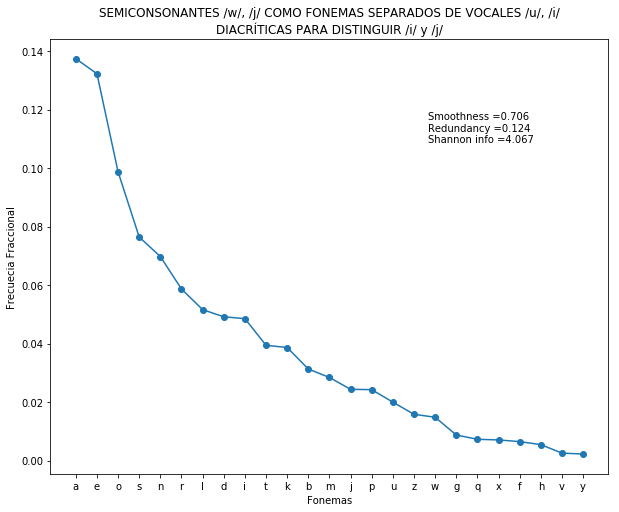

In [28]:
data_1700 = productos(texto_1700)
data_1725 = productos(texto_1725)
data_1750 = productos(texto_1750)
data_1775 = productos(texto_1775)
data_1800 = productos(texto_1800)
data_1825 = productos(texto_1825)
data_1850 = productos(texto_1850)
data_1875 = productos(texto_1875)
data_1900 = productos(texto_1900)
data_1925 = productos(texto_1925)
data_2000 = productos(texto_2000)
trace_1700 = go.Scatter(x = list(range(0,len(data_1700.index))), y = data_1700['Fraccional'], mode = 'lines+markers')
trace_1725 = go.Scatter(x = list(range(0,len(data_1725.index))), y = data_1725['Fraccional'], mode = 'lines+markers')

In [29]:
data = [data_1700,data_1725,data_1750,data_1775,data_1800,data_1825,data_1850,data_1875,data_1900,data_1925,data_2000]

In [30]:
years = ['1700','1725','1750','1775','1800','1825','1850','1875','1900','1925','2000']

In [31]:
# make figure
figure = {
    'data': [],
    'layout': {},
    'frames': []
}

In [32]:
figure['layout']['xaxis'] = {'range': [0, 25], 'title': 'Fonemas'}
figure['layout']['yaxis'] = {'title': 'Frecuencia Fraccional'}
figure['layout']['hovermode'] = 'closest'

In [33]:
figure['layout']['sliders'] = {
    'args': [
        'transition', {
            'duration': 400,
            'easing': 'cubic-in-out'
        }
    ],
    'initialValue': '1700',
    'plotlycommand': 'animate',
    'values': years,
    'visible': True
}

In [34]:
figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Year:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 400, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}

In [35]:
data_dict2 = {
        'x': list((range(0,len(data[0].index)))),
        'y': list(data[0]['Fraccional']),
        'mode': 'markers',
        'text': list(data[0].index),
        #'marker': {
            #'sizemode': 'area',
            #'sizeref': 200000,
            #'size': list(dataset_by_year_and_cont['pop'])
        #},
        #'name': years[year_ind]
    }
figure['data'].append(data_dict2)

# make data
i = 0
for x in data:
    data_dict = {
        'x': list((range(0,len(x.index)))),
        'y': list(x['Fraccional']),
        'mode': 'markers',
        'text': list(x.index),
        #'marker': {
            #'sizemode': 'area',
            #'sizeref': 200000,
            #'size': list(dataset_by_year_and_cont['pop'])
        #},
        #'name': years[i]
    }
    figure['data'].append(data_dict)
    i = i+1

In [36]:
# make frames
year_ind = 0
for x in data:
    year = years[year_ind]
    frame = {'data': [], 'name': str(years[year_ind])}

    data_dict = {
        'x': list((range(0,len(x.index)))),
        'y': list(x['Fraccional']),
        'mode': 'markers',
        'text': list(x.index),
        #'marker': {
            #'sizemode': 'area',
            #'sizeref': 200000,
            #'size': list(dataset_by_year_and_cont['pop'])
        #},
        #'name': years[year_ind]
    }
    frame['data'].append(data_dict)
    #figure['data'].append(data_dict)
    
    figure['frames'].append(frame)
    slider_step = {'args': [
        [year],
        {'frame': {'duration': 400, 'redraw': False},
         'mode': 'immediate',
       'transition': {'duration': 300}}
     ],
     'label': year,
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)
    
    year_ind = year_ind+1

In [37]:
figure['layout']['sliders'] = [sliders_dict]

iplot(figure)

In [128]:
data[3].iloc[0]

Frecuencia    28555.000000
Fraccional        0.147641
Name: e, dtype: float64

In [38]:
from plotly.offline import plot
plot(figure, filename='España_diac.html')

'España_diac.html'